In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\sanje_crlv28m\Downloads\Train_Data.csv")
print(df.shape)
df.head()

(4999, 9)


,text,author,controversiality,parent_text,parent_score,parent_votes,parent_author,parent_controversiality,Score
0,i must be retarded i thought it meant con lawl...,['calantus'],0,"It's quite unfair to call Hillary Clinton a ""c...",245,245,Whisper,0,-8
1,DOWNMODDED FOR IRRELEVANCE? ISN'T THAT HOW THI...,['Shadowrose'],0,upmodded for awesome kindness,32,32,b3mus3d,0,-16
2,"THAT WAS SUPPOSED TO MEAN "" BY A PLACE WHERE P...",['NExusRush'],0,"What the hell does ""because its by a golf cour...",12,12,mr_jellyneck,0,-7
3,I THOUGHT EVERYONE DID; ITS FUCKING DELICIOUS :\,['R0N_SWANS0N'],0,NICE TRY JENNIFER! I KNOW IT'S YOU AND I KNOW...,117,117,ometzo,0,67
4,"Great work, Zhesbe! I'd give you a raise but y...",['reddums'],0,"""HEY BOSS COME LOOK AT WHAT I DID!""",1933,1933,Zhesbe,0,1348


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   text                     4999 non-null   object
 1   author                   4999 non-null   object
 2   controversiality         4999 non-null   int64 
 3   parent_text              4999 non-null   object
 4   parent_score             4999 non-null   int64 
 5   parent_votes             4999 non-null   int64 
 6   parent_author            4999 non-null   object
 7   parent_controversiality  4999 non-null   int64 
 8   Score                    4999 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 351.6+ KB


In [4]:
cols = ['text', 'author', 'controversiality', 'parent_text', 'parent_score', 'parent_votes', 
        'parent_author', 'parent_controversiality', 'Score']
for col in cols:
    print(col,':',df[col].nunique())

text : 4992
author : 4317
controversiality : 2
parent_text : 4992
parent_score : 1001
parent_votes : 1001
parent_author : 4448
parent_controversiality : 2
Score : 572


In [5]:
# Compare score with votes
df['score vs. votes'] = df['parent_score']==df['parent_votes']
df['score vs. votes'].nunique()

1

In [6]:
# Since they are the same, we can drop one of them
df.drop(['parent_votes', 'score vs. votes'], axis= 1, inplace=True)
df.head()

,text,author,controversiality,parent_text,parent_score,parent_author,parent_controversiality,Score
0,i must be retarded i thought it meant con lawl...,['calantus'],0,"It's quite unfair to call Hillary Clinton a ""c...",245,Whisper,0,-8
1,DOWNMODDED FOR IRRELEVANCE? ISN'T THAT HOW THI...,['Shadowrose'],0,upmodded for awesome kindness,32,b3mus3d,0,-16
2,"THAT WAS SUPPOSED TO MEAN "" BY A PLACE WHERE P...",['NExusRush'],0,"What the hell does ""because its by a golf cour...",12,mr_jellyneck,0,-7
3,I THOUGHT EVERYONE DID; ITS FUCKING DELICIOUS :\,['R0N_SWANS0N'],0,NICE TRY JENNIFER! I KNOW IT'S YOU AND I KNOW...,117,ometzo,0,67
4,"Great work, Zhesbe! I'd give you a raise but y...",['reddums'],0,"""HEY BOSS COME LOOK AT WHAT I DID!""",1933,Zhesbe,0,1348


<AxesSubplot:>

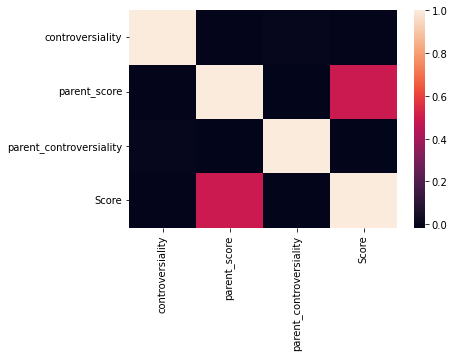

In [7]:
# Correlation of numerical features
cor = df.corr()
sns.heatmap(cor)

In [8]:
# Natural Language Processing
categorical_cols = ['text','author','parent_text','parent_author']
for col in df[categorical_cols]:
    df[col] = df[col].str.lower()
    df[col] = df[col].str.strip()
df.head()

,text,author,controversiality,parent_text,parent_score,parent_author,parent_controversiality,Score
0,i must be retarded i thought it meant con lawl...,['calantus'],0,"it's quite unfair to call hillary clinton a ""c...",245,whisper,0,-8
1,downmodded for irrelevance? isn't that how thi...,['shadowrose'],0,upmodded for awesome kindness,32,b3mus3d,0,-16
2,"that was supposed to mean "" by a place where p...",['nexusrush'],0,"what the hell does ""because its by a golf cour...",12,mr_jellyneck,0,-7
3,i thought everyone did; its fucking delicious :\,['r0n_swans0n'],0,nice try jennifer! i know it's you and i know...,117,ometzo,0,67
4,"great work, zhesbe! i'd give you a raise but y...",['reddums'],0,"""hey boss come look at what i did!""",1933,zhesbe,0,1348


In [9]:
#Remove punctuation marks
import string

for col in df[categorical_cols]:
    df[col] = df[col].apply(lambda x:''.join([i for i in x if i not in string.punctuation]))
df.head()

,text,author,controversiality,parent_text,parent_score,parent_author,parent_controversiality,Score
0,i must be retarded i thought it meant con lawl...,calantus,0,its quite unfair to call hillary clinton a cun...,245,whisper,0,-8
1,downmodded for irrelevance isnt that how this ...,shadowrose,0,upmodded for awesome kindness,32,b3mus3d,0,-16
2,that was supposed to mean by a place where pe...,nexusrush,0,what the hell does because its by a golf cours...,12,mrjellyneck,0,-7
3,i thought everyone did its fucking delicious,r0nswans0n,0,nice try jennifer i know its you and i know y...,117,ometzo,0,67
4,great work zhesbe id give you a raise but you ...,reddums,0,hey boss come look at what i did,1933,zhesbe,0,1348


In [10]:
#tokenization

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanje_crlv28m\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sanje_crlv28m\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [11]:
def text_tokens(row):
    text = row['text']
    tokens = word_tokenize(text)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words
df['text_tokens'] = df.apply(text_tokens, axis=1)

In [12]:
def parent_text_tokens(row):
    parent_text = row['parent_text']
    tokens = word_tokenize(parent_text)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words
df['parent_text_tokens'] = df.apply(parent_text_tokens, axis=1)

In [13]:
df.head()

,text,author,controversiality,parent_text,parent_score,parent_author,parent_controversiality,Score,text_tokens,parent_text_tokens
0,i must be retarded i thought it meant con lawl...,calantus,0,its quite unfair to call hillary clinton a cun...,245,whisper,0,-8,"[i, must, be, retarded, i, thought, it, meant,...","[its, quite, unfair, to, call, hillary, clinto..."
1,downmodded for irrelevance isnt that how this ...,shadowrose,0,upmodded for awesome kindness,32,b3mus3d,0,-16,"[downmodded, for, irrelevance, isnt, that, how...","[upmodded, for, awesome, kindness]"
2,that was supposed to mean by a place where pe...,nexusrush,0,what the hell does because its by a golf cours...,12,mrjellyneck,0,-7,"[that, was, supposed, to, mean, by, a, place, ...","[what, the, hell, does, because, its, by, a, g..."
3,i thought everyone did its fucking delicious,r0nswans0n,0,nice try jennifer i know its you and i know y...,117,ometzo,0,67,"[i, thought, everyone, did, its, fucking, deli...","[nice, try, jennifer, i, know, its, you, and, ..."
4,great work zhesbe id give you a raise but you ...,reddums,0,hey boss come look at what i did,1933,zhesbe,0,1348,"[great, work, zhesbe, id, give, you, a, raise,...","[hey, boss, come, look, at, what, i, did]"


In [14]:
#stop word removal
stop_words = stopwords.words('english')

tokens_cols = ['text_tokens','parent_text_tokens']

for col in tokens_cols:
    df[col] = df[col].apply(lambda x: ' '.join([w for w in x if w not in (stop_words)]))
df.head()

,text,author,controversiality,parent_text,parent_score,parent_author,parent_controversiality,Score,text_tokens,parent_text_tokens
0,i must be retarded i thought it meant con lawl...,calantus,0,its quite unfair to call hillary clinton a cun...,245,whisper,0,-8,must retarded thought meant con lawl oh well work,quite unfair call hillary clinton cunt lacks d...
1,downmodded for irrelevance isnt that how this ...,shadowrose,0,upmodded for awesome kindness,32,b3mus3d,0,-16,downmodded irrelevance isnt works,upmodded awesome kindness
2,that was supposed to mean by a place where pe...,nexusrush,0,what the hell does because its by a golf cours...,12,mrjellyneck,0,-7,supposed mean place people undoubtedly snake b...,hell golf course anything think bunch rich whi...
3,i thought everyone did its fucking delicious,r0nswans0n,0,nice try jennifer i know its you and i know y...,117,ometzo,0,67,thought everyone fucking delicious,nice try jennifer know know like baba ganoush
4,great work zhesbe id give you a raise but you ...,reddums,0,hey boss come look at what i did,1933,zhesbe,0,1348,great work zhesbe id give raise seem handled,hey boss come look


In [15]:
#normalization - lemmatizing
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
lemmatize_function = lambda x: [lemmatizer.lemmatize(str(word)) for word in x.split()]

for col in tokens_cols:
    df[col] = df[col].apply(lemmatize_function)
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sanje_crlv28m\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,author,controversiality,parent_text,parent_score,parent_author,parent_controversiality,Score,text_tokens,parent_text_tokens
0,i must be retarded i thought it meant con lawl...,calantus,0,its quite unfair to call hillary clinton a cun...,245,whisper,0,-8,"[must, retarded, thought, meant, con, lawl, oh...","[quite, unfair, call, hillary, clinton, cunt, ..."
1,downmodded for irrelevance isnt that how this ...,shadowrose,0,upmodded for awesome kindness,32,b3mus3d,0,-16,"[downmodded, irrelevance, isnt, work]","[upmodded, awesome, kindness]"
2,that was supposed to mean by a place where pe...,nexusrush,0,what the hell does because its by a golf cours...,12,mrjellyneck,0,-7,"[supposed, mean, place, people, undoubtedly, s...","[hell, golf, course, anything, think, bunch, r..."
3,i thought everyone did its fucking delicious,r0nswans0n,0,nice try jennifer i know its you and i know y...,117,ometzo,0,67,"[thought, everyone, fucking, delicious]","[nice, try, jennifer, know, know, like, baba, ..."
4,great work zhesbe id give you a raise but you ...,reddums,0,hey boss come look at what i did,1933,zhesbe,0,1348,"[great, work, zhesbe, id, give, raise, seem, h...","[hey, bos, come, look]"


In [16]:
df['text']= df['text_tokens'].apply(lambda x: ' '.join(x))
df['parent_text']= df['parent_text_tokens'].apply(lambda x: ' '.join(x))
df.drop(['text_tokens', 'parent_text_tokens'], axis=1, inplace= True)

df.head()

,text,author,controversiality,parent_text,parent_score,parent_author,parent_controversiality,Score
0,must retarded thought meant con lawl oh well work,calantus,0,quite unfair call hillary clinton cunt lack de...,245,whisper,0,-8
1,downmodded irrelevance isnt work,shadowrose,0,upmodded awesome kindness,32,b3mus3d,0,-16
2,supposed mean place people undoubtedly snake b...,nexusrush,0,hell golf course anything think bunch rich whi...,12,mrjellyneck,0,-7
3,thought everyone fucking delicious,r0nswans0n,0,nice try jennifer know know like baba ganoush,117,ometzo,0,67
4,great work zhesbe id give raise seem handled,reddums,0,hey bos come look,1933,zhesbe,0,1348


In [17]:
# Vectorize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = CountVectorizer()
text = vectorizer.fit_transform(df['text']).toarray()
text = pd.DataFrame(text, columns=vectorizer.get_feature_names())

text.shape

C:\Users\sanje_crlv28m\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(4999, 13109)

In [18]:
vectorizer1 = TfidfVectorizer(max_features=50,min_df=1,max_df=0.7)
text_tf_idf = vectorizer1.fit_transform(df['text']).toarray()
text_tf_idf = pd.DataFrame(text_tf_idf, columns=vectorizer1.get_feature_names())

text_tf_idf.shape

C:\Users\sanje_crlv28m\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(4999, 50)

In [19]:
num_cols = df[['controversiality', 'parent_score', 'parent_controversiality']]
x = pd.concat([text_tf_idf, num_cols], axis=1)
y = df['Score']

In [20]:
# import train_test_split
from sklearn.model_selection import train_test_split

# split the data
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2, random_state = 42)

In [21]:
# Machine Learining Models
# Linear regressor
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

pred_y = lr.predict(x_val)

In [22]:
# Root mean squared error 
from sklearn.metrics import mean_squared_error
print('Root Mean Squared Error is: ', np.sqrt(mean_squared_error(y_val, pred_y)))

Root Mean Squared Error is:  147.63289313356805
